In [128]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA
%matplotlib inline

In [75]:
impactper = pd.read_csv('Data/impact_performance.csv')

In [76]:
d75schools = pd.read_excel('Data/2014_2015_D75_SQR_Results_2016_06_06.xlsx', header=1)
earlychschools = pd.read_excel('Data/2014_2015_EC_SQR_Results_2015_06_16.xlsx', header=1)
elemidk8schools = pd.read_excel('Data/2014_2015_EMS_SQR_Results_2016_04_08.xlsx', header=1)
highschools = pd.read_excel('Data/2014_2015_HS_SQR_Results_2016_04_08.xlsx', header=1)
transhighschools = pd.read_excel('Data/2014_2015_HST_SQR_Results_2016_06_06.xlsx', header=1)
yabcschools = pd.read_excel('Data/2014_2015_YABC_SQR_Results_2016_06_06.xlsx', header=1)

In [77]:
datalist=[d75schools, earlychschools, elemidk8schools, highschools, transhighschools, yabcschools]

In [97]:
columnlist=[]
print(len(datalist))
for i in datalist:
    rawcolumnlist=i.columns
    rawcolumnlist=list(rawcolumnlist)
    for j in range(len(rawcolumnlist)):
        string = str(rawcolumnlist[j])
        columnlist.append(string)
        
columnlist
print(len(columnlist))

6
198


In [99]:
#counter=[]
#for i in xrange(len(columnlist)):
#    counter.append(columnlist.count(columnlist[i]))
#counter

In [85]:
columnlist.index(columnlist[30])

0

In [95]:
columnlistnorep = []
print(len(datalist))
for i in datalist:
    rawcolumnlist = i.columns
    rawcolumnlist = list(rawcolumnlist)
    for j in range(len(rawcolumnlist)):
        string = str(rawcolumnlist[j])
        if string in columnlistnorep:
            string
        else:
            columnlistnorep.append(string)
        
print(len(columnlistnorep))

6
45


In [105]:
counter=[]
for i in xrange(len(columnlistnorep)):
    counter.append(columnlist.count(columnlistnorep[i]))
counter
for j in range(len(counter)):
    print columnlistnorep[j], ' = ', counter[j]

DBN  =  6
School Name  =  6
School Type  =  6
Enrollment  =  6
Rigorous Instruction - Percent Positive  =  6
Collaborative Teachers - Percent Positive  =  6
Supportive Environment - Percent Positive  =  6
Effective School Leadership - Percent Positive  =  6
Strong Family-Community Ties - Percent Positive  =  6
Trust - Percent Positive  =  6
Quality Review - How interesting and challenging is the curriculum?  =  5
Quality Review - How effective is the teaching and learning?  =  5
Quality Review - How well does the school assess what students are learning?  =  5
Quality Review - How well do teachers work with each other?  =  5
Quality Review - How clearly are high expectations communicated to students and staff?  =  5
Quality Review - Dates of Review  =  5
Percent English Language Learners  =  6
Percent Students with Disabilities  =  6
Percent Self-Contained  =  6
Economic Need Index  =  6
Percent in Temp Housing  =  4
Percent HRA Eligible  =  6
Percent Asian  =  6
Percent Black  =  6
Pe

rawcolumnlist=yabcschools.columns
rawcolumnlist=list(rawcolumnlist)
print(len(rawcolumnlist),rawcolumnlist[0])
#yabcschools.drop()
#yabcschools.drop('column_name')
#renamecolumn=yabcschools.iloc[0:1]
#renamecolumn
columnlist=[]
for i in range(len(rawcolumnlist)):
    string = str(rawcolumnlist[i])
    columnlist.append(string)
columnlist


In [117]:
allschools = pd.concat([d75schools, earlychschools, elemidk8schools, highschools, transhighschools, yabcschools], ignore_index=True)

In [118]:
allschools.head(3)
rawcolumnlist=allschools.columns
rawcolumnlist=list(rawcolumnlist)
print(len(rawcolumnlist),rawcolumnlist[0])
#yabcschools.drop()
#yabcschools.drop('column_name')
#renamecolumn=yabcschools.iloc[0:1]
#renamecolumn
princolumnlist=[]
for i in range(len(rawcolumnlist)):
    string = str(rawcolumnlist[i])
    princolumnlist.append(string)
#princolumnlist

(45, u'Average Change in Student Attendance')


#### Testing Start dropping columns

In [119]:
notneeded = ['Rigorous Instruction Rating', 'Collaborative Teachers Rating',\
             'Supportive Environment Rating', 'Effective School Leadership Rating', \
             'Strong Family-Community Ties Rating', 'Trust Rating', \
             'Student Achievement Rating',\
             'Quality Review - How interesting and challenging is the curriculum?', \
             'Quality Review - How effective is the teaching and learning?', \
             'Quality Review - How well does the school assess what students are learning?',\
             'Quality Review - How well do teachers work with each other?', \
             'Quality Review - How clearly are high expectations communicated to students and staff?',\
             'Quality Review - Dates of Review']

In [120]:
def dropping(data):
    data.drop(notneeded,axis=1,inplace=True)
    return data

In [121]:
#elemidk8schools = dropping(elemidk8schools)
allschools = dropping(allschools)
allschools.head(3)

Average Change in Student Attendance  Average Grade 4 English Proficiency  \
0                                 0.023                                  NaN   
1                                 0.001                                  NaN   
2                                 0.008                                  NaN   

   Average Grade 4 Math Proficiency  Average Grade 8 English Proficiency  \
0                               NaN                                  NaN   
1                               NaN                                  NaN   
2                               NaN                                  NaN   

   Average Grade 8 Math Proficiency  \
0                               NaN   
1                               NaN   
2                               NaN   

   Collaborative Teachers - Percent Positive     DBN  Economic Need Index  \
0                                       0.87  75K004                0.775   
1                                       0.90  75K036                0.837   
2                                       0.90  75K053                0.769   

   Effective School Leadership - Percent Positive  Enrollment  \
0                                            0.78         353   
1                                            0.85         269   
2                                            0.82         400   

                       ...                       \
0                      ...                        
1                      ...                        
2                      ...                        

   Percent of teachers with 3 or more years of experience  \
0                                              0.856        
1                                              0.850        
2                                              0.756        

   Rigorous Instruction - Percent Positive  School Name  School Type  \
0                                     0.75    P.S. K004          D75   
1                                     0.87      P.S. 36          D75   
2                                     0.86    P.S. K053          D75   

   Strong Family-Community Ties - Percent Positive  Student Attendance Rate  \
0                                             0.84                      NaN   
1                                             0.94                      NaN   
2                                             0.86                      NaN   

   Supportive Environment - Percent Positive  Teacher Attendance Rate  \
0                                       0.96                    0.958   
1                                       0.82                    0.939   
2                                       0.98                    0.965   

   Trust - Percent Positive  Years of principal experience at this school  
0                      0.89                                           6.7  
1                      0.93                                          12.9  
2                      0.93                                           4.6  

[3 rows x 32 columns]

In [125]:
impactper.head(3)
impactper = impactper.rename(columns = {'dbn':'DBN'})
impactper.head(3)

district     DBN school_type                school_name  impact  \
0         1  01M015  Elementary  P.S. 015 Roberto Clemente    0.30   
1         1  01M019  Elementary        P.S. 019 Asher Levy    0.72   
2         1  01M020  Elementary       P.S. 020 Anna Silver    0.44   

   performance  
0         0.21  
1         0.52  
2         0.33

In [127]:
schools = pd.merge(allschools, impactper, on='DBN')
schools.head(3)

Average Change in Student Attendance  Average Grade 4 English Proficiency  \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2                                   NaN                                  NaN   

   Average Grade 4 Math Proficiency  Average Grade 8 English Proficiency  \
0                               NaN                                  NaN   
1                               NaN                                  NaN   
2                               NaN                                  NaN   

   Average Grade 8 Math Proficiency  \
0                               NaN   
1                               NaN   
2                               NaN   

   Collaborative Teachers - Percent Positive     DBN  Economic Need Index  \
0                                       0.99  05M517                0.536   
1                                       0.99  06M513                0.615   
2                                       1.00  07X359                0.897   

   Effective School Leadership - Percent Positive  Enrollment     ...       \
0                                            0.97         218     ...        
1                                            0.97         152     ...        
2                                            0.98         275     ...        

   Student Attendance Rate  Supportive Environment - Percent Positive  \
0                    0.948                                       0.99   
1                    0.947                                       0.96   
2                    0.921                                       0.99   

   Teacher Attendance Rate  Trust - Percent Positive  \
0                    0.976                      0.99   
1                    0.995                      0.97   
2                    0.985                      0.99   

   Years of principal experience at this school  district  school_type  \
0                                           NaN         5   Elementary   
1                                           3.0         6   Elementary   
2                                           2.0         7   Elementary   

                           school_name  impact  performance  
0    Teachers College Community School     NaN          NaN  
1                 Castle Bridge School     NaN          NaN  
2  Concourse Village Elementary School     NaN          NaN  

[3 rows x 37 columns]

In [225]:
schoolcleanname = schools
schoolcleanname = schoolcleanname.rename(columns = {'Rigorous Instruction - Percent Positive':'Rigorous_Instruction'})
schoolcleanname = schoolcleanname.rename(columns = {'Collaborative Teachers - Percent Positive':'Collaborative_Teachers'})
schoolcleanname = schoolcleanname.rename(columns = {'Supportive Environment - Percent Positive':'Supportive_Environment'})
schoolcleanname = schoolcleanname.rename(columns = {'Effective School Leadership - Percent Positive':'Effective_SchoolLeadership'})
schoolcleanname = schoolcleanname.rename(columns = {'Strong Family-Community Ties - Percent Positive':'Strong_FamilyCommunityTies'})
schoolcleanname = schoolcleanname.rename(columns = {'Trust - Percent Positive':'Trust'})

namesincol=(schoolcleanname.columns)
dalist=[]
for i in range(len(namesincol)):
    y=str(namesincol[i])
    dalist.append(y)
    print(i,dalist[i])

forplot = [dalist[5], dalist[8], dalist[23], dalist[26], dalist[28], dalist[30], dalist[9], dalist[7], dalist[13], dalist[12], dalist[27], dalist[31], dalist[29], dalist[10], dalist[11], dalist[14], dalist[18], dalist[16], dalist[17], dalist[19], dalist[20], dalist[21], dalist[22], dalist[15]]
len(forplot)

(0, 'Average Change in Student Attendance')
(1, 'Average Grade 4 English Proficiency')
(2, 'Average Grade 4 Math Proficiency')
(3, 'Average Grade 8 English Proficiency')
(4, 'Average Grade 8 Math Proficiency')
(5, 'Collaborative_Teachers')
(6, 'DBN')
(7, 'Economic Need Index')
(8, 'Effective_SchoolLeadership')
(9, 'Enrollment')
(10, 'Percent Asian')
(11, 'Percent Black')
(12, 'Percent English Language Learners')
(13, 'Percent HRA Eligible')
(14, 'Percent Hispanic')
(15, 'Percent Overage/ Undercredit')
(16, 'Percent Self-Contained')
(17, 'Percent Students with Disabilities')
(18, 'Percent White')
(19, 'Percent in Temp Housing')
(20, 'Percent in Temp Housing - 4yr')
(21, 'Percent of Students Chronically Absent')
(22, 'Percent of teachers with 3 or more years of experience')
(23, 'Rigorous_Instruction')
(24, 'School Name')
(25, 'School Type')
(26, 'Strong_FamilyCommunityTies')
(27, 'Student Attendance Rate')
(28, 'Supportive_Environment')
(29, 'Teacher Attendance Rate')
(30, 'Trust')
(31,

24

### Impact 
is based on how the school's results compared to its Comparison Group of similar students (based on factors as incoming test scores, disability status and economic need)

### Performance 
is based on how the school's results compared to the citywide average (without any adjustment based on incoming student factors)

C:\Users\ferna\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


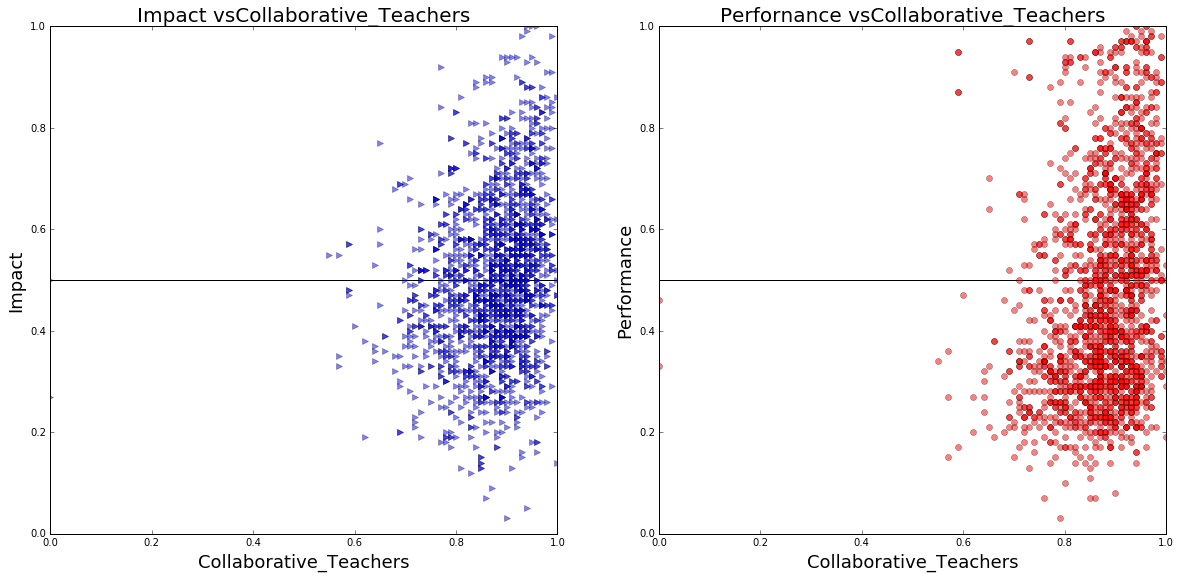

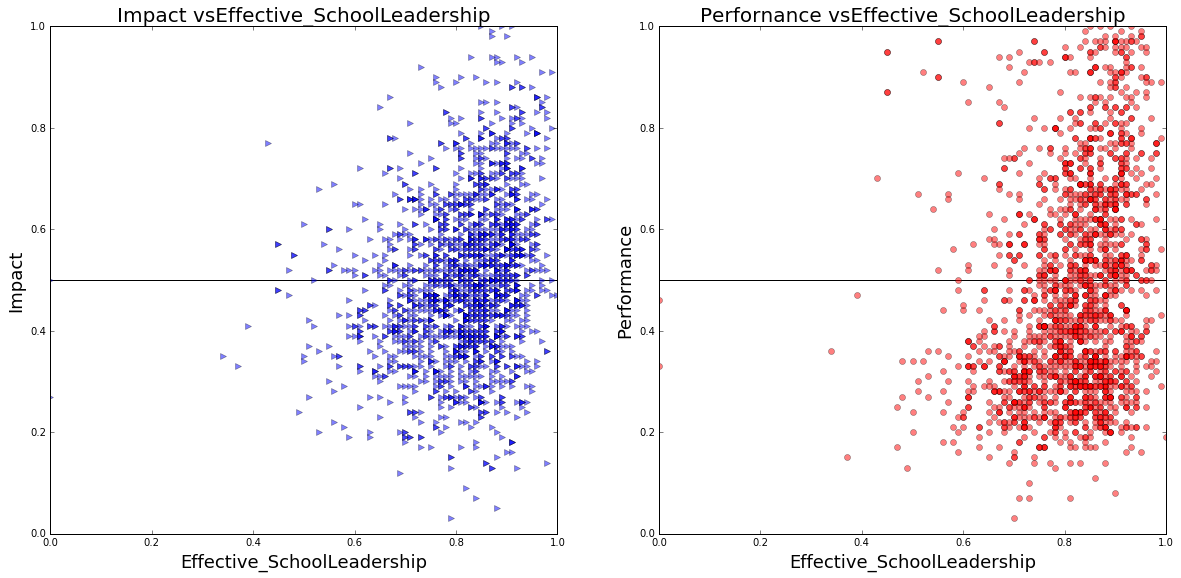

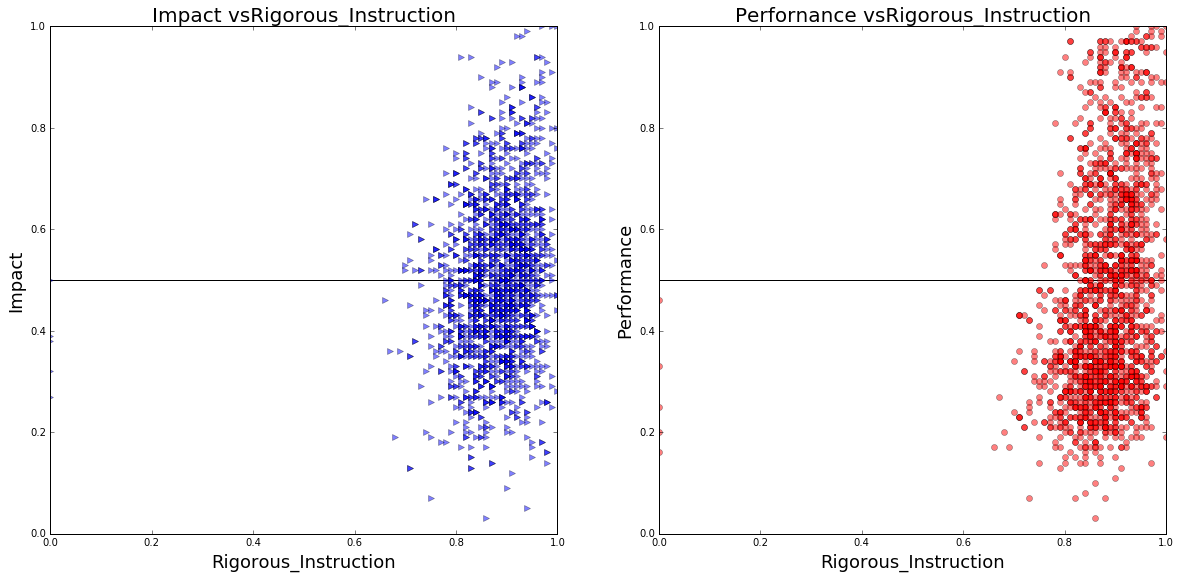

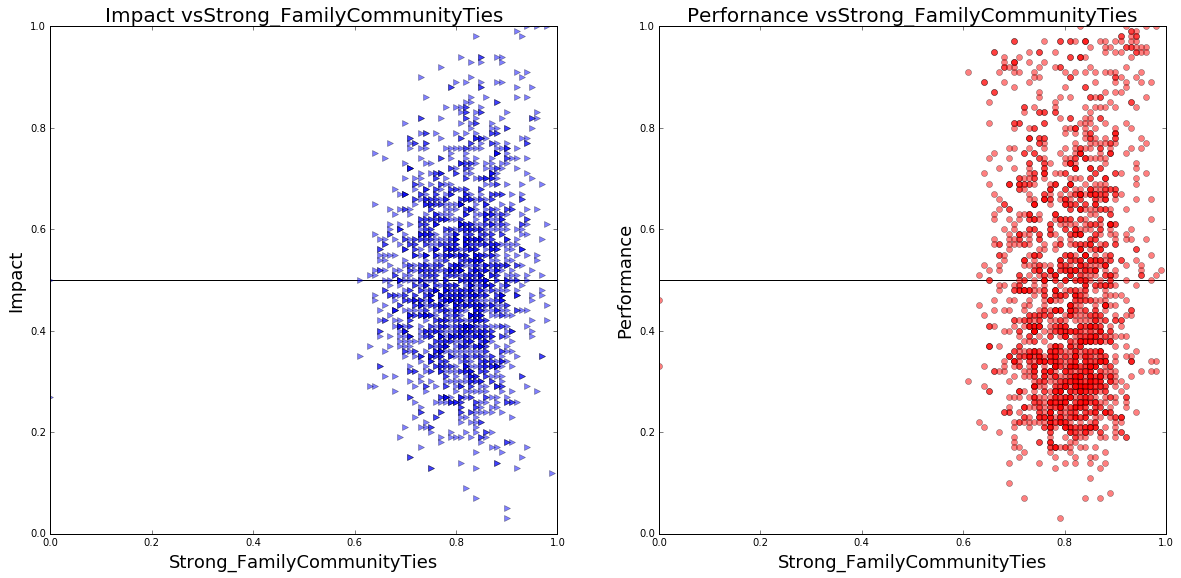

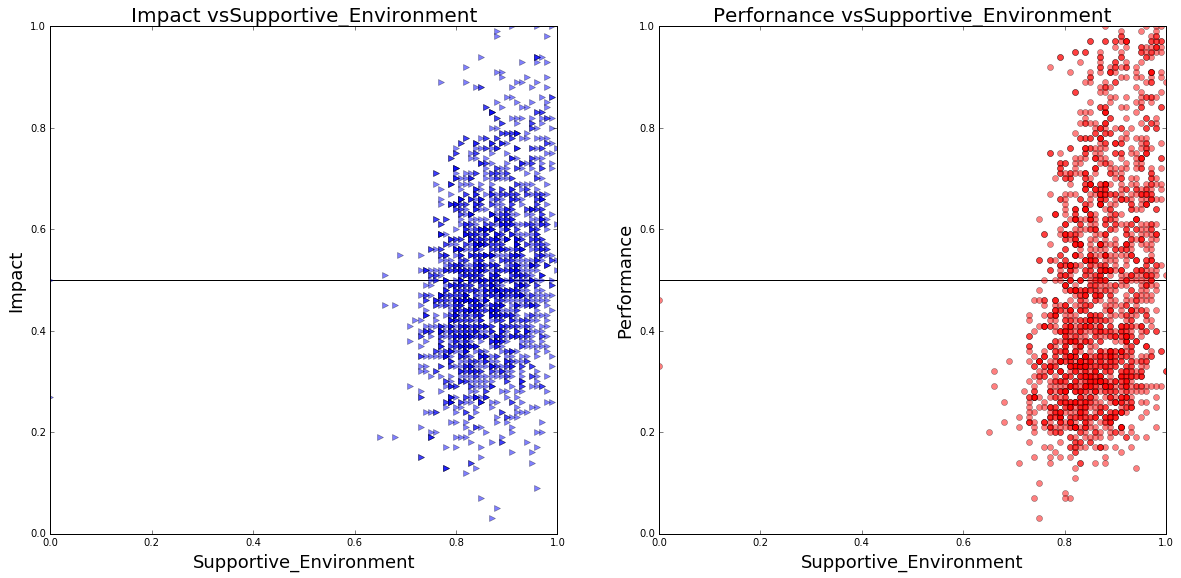

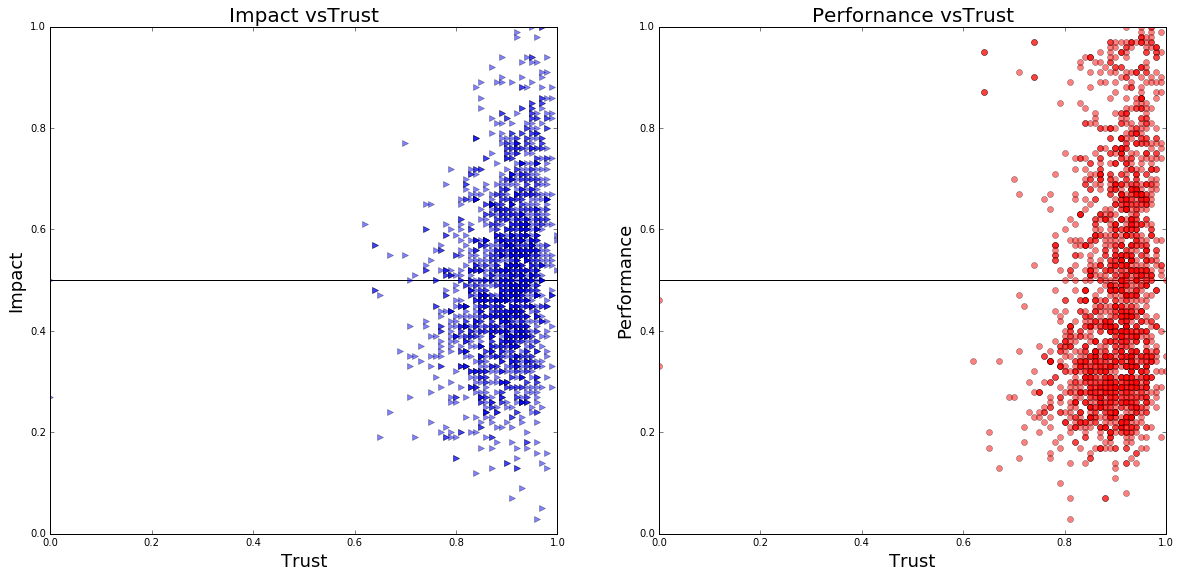

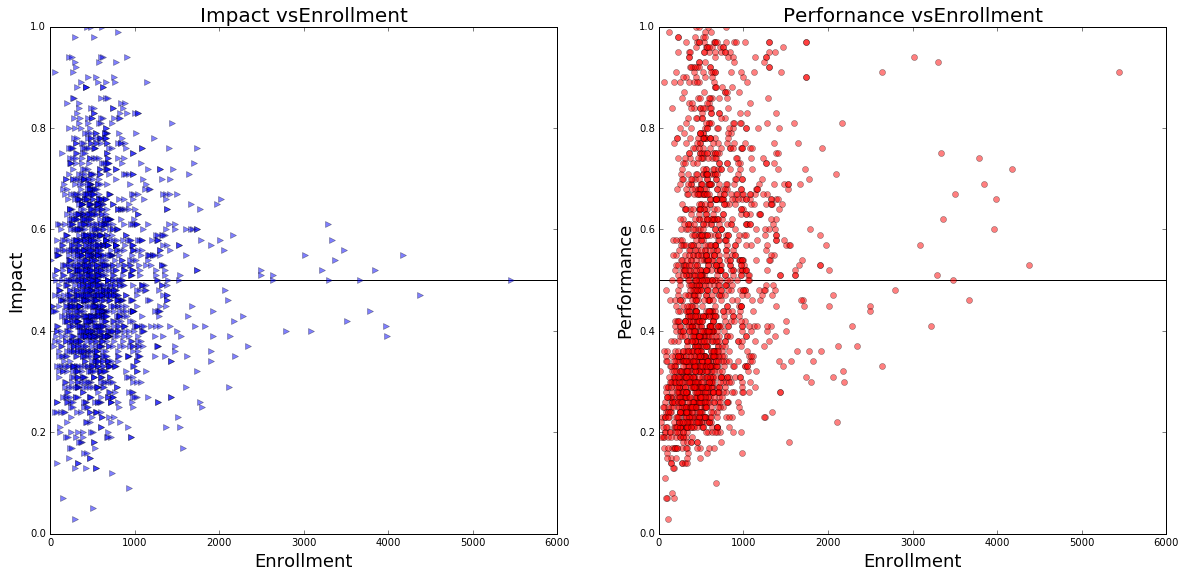

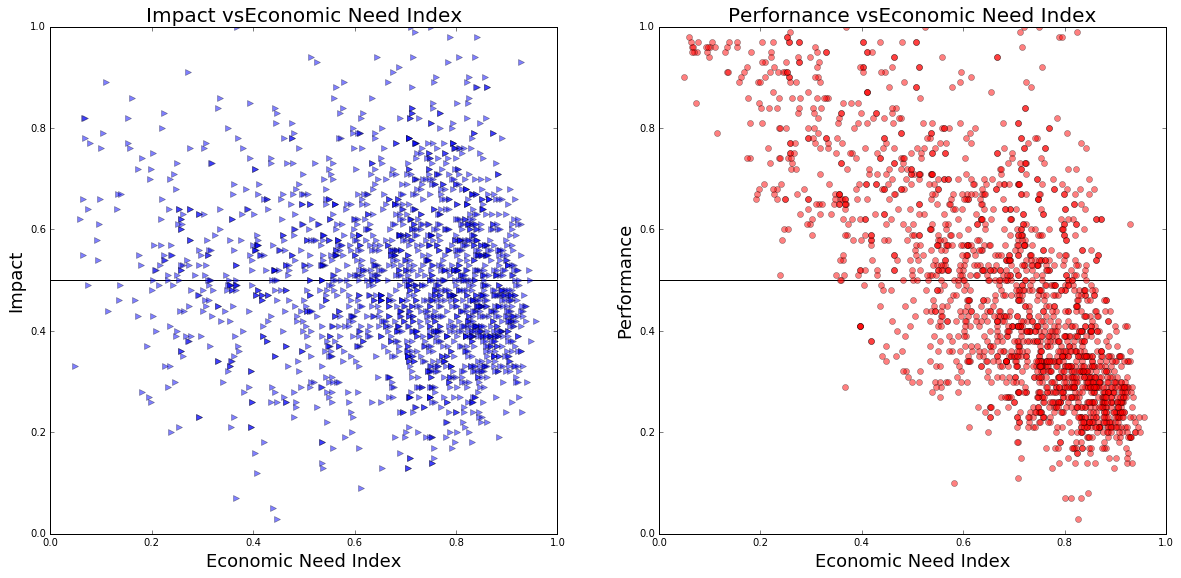

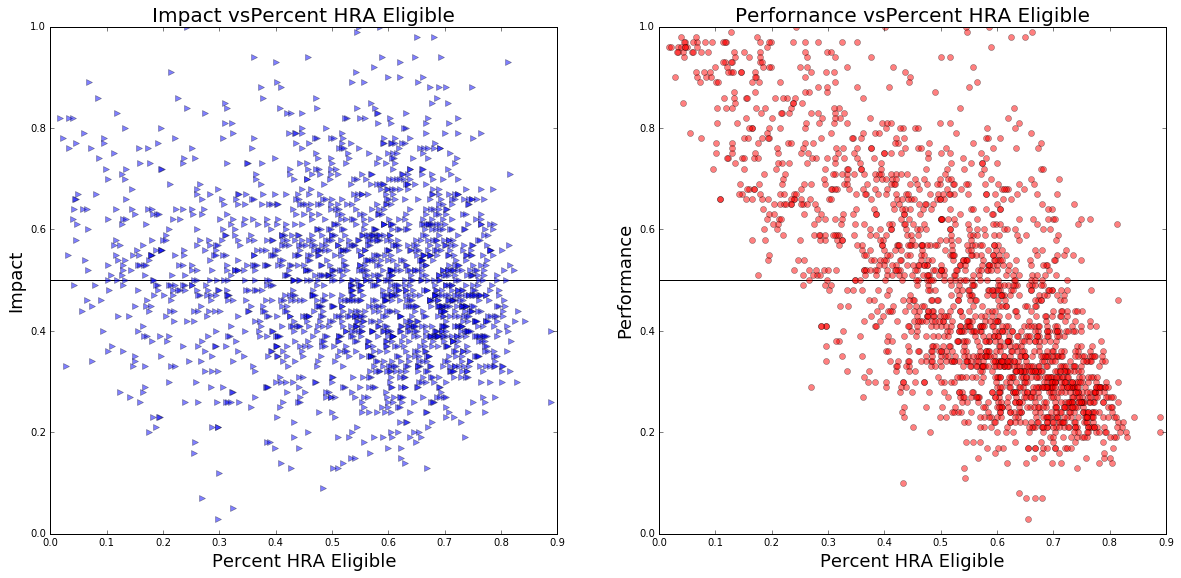

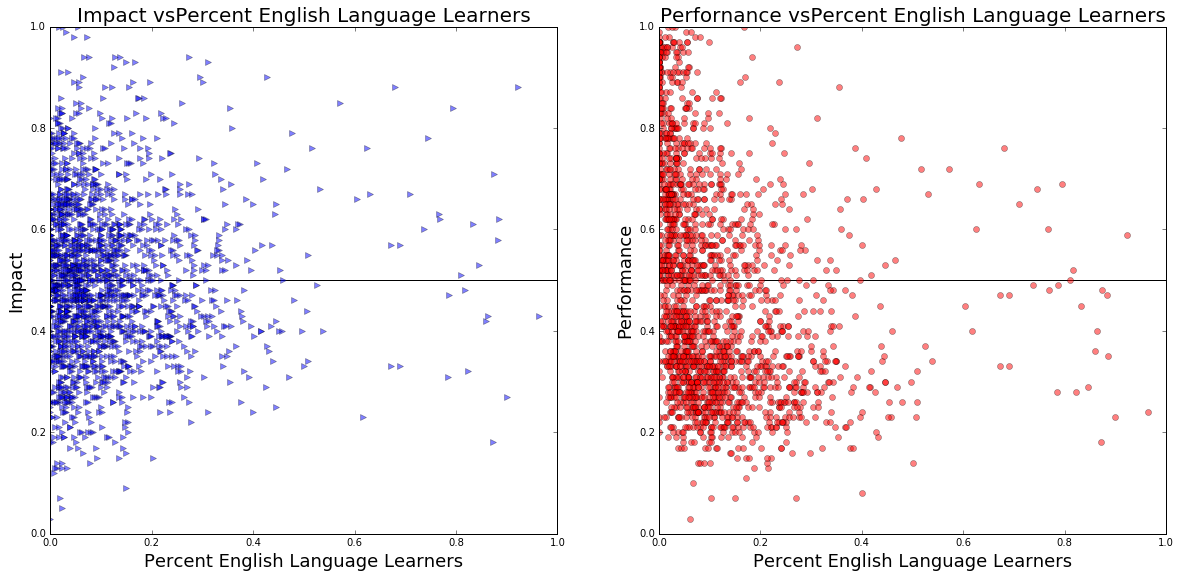

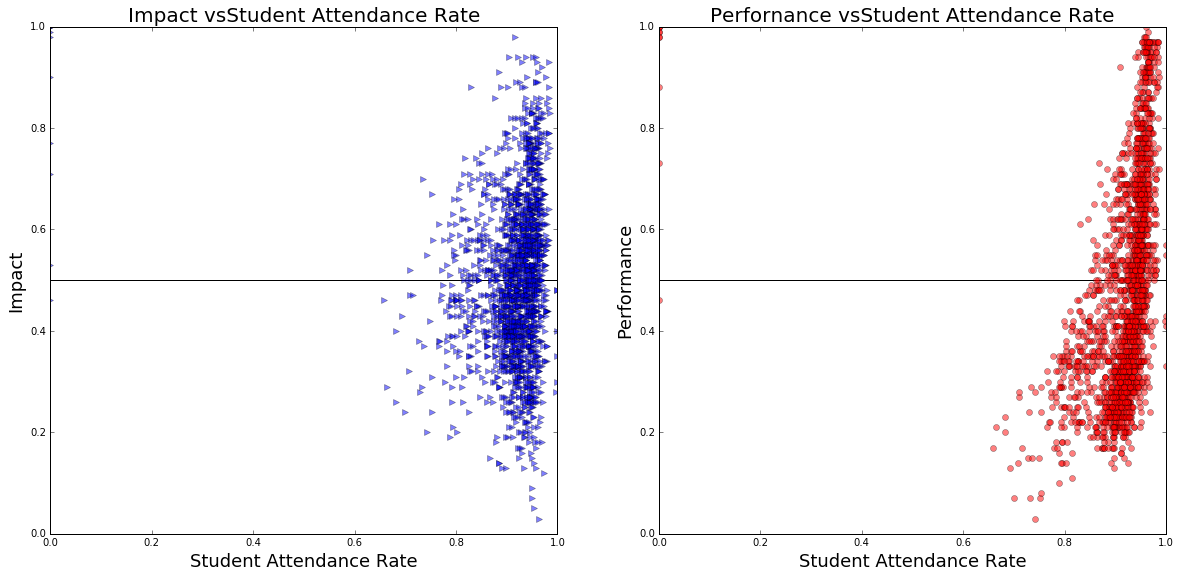

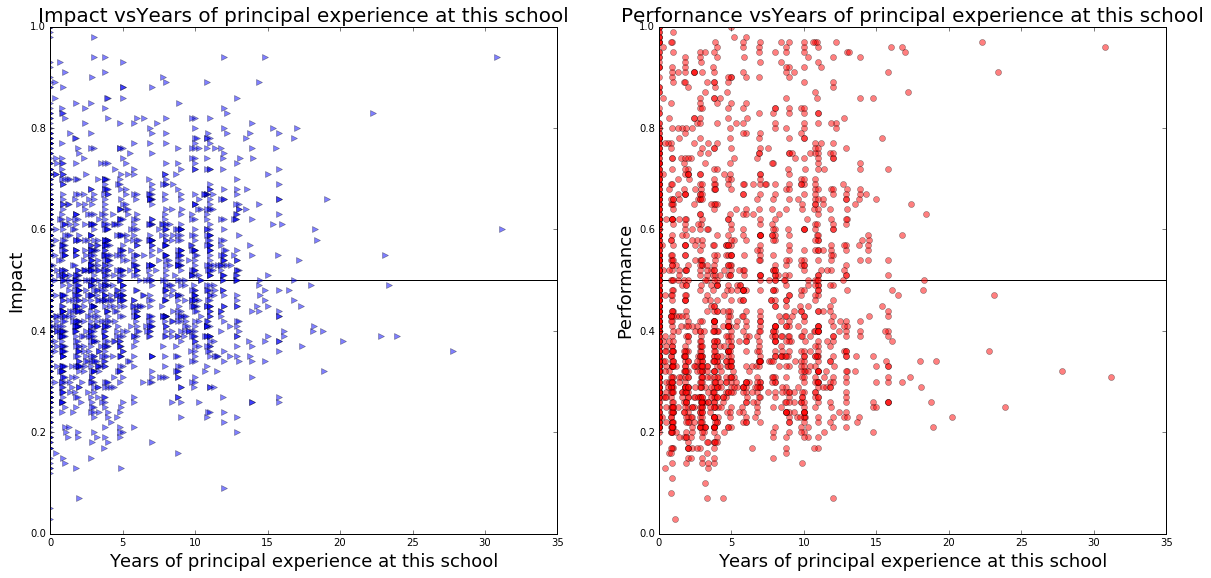

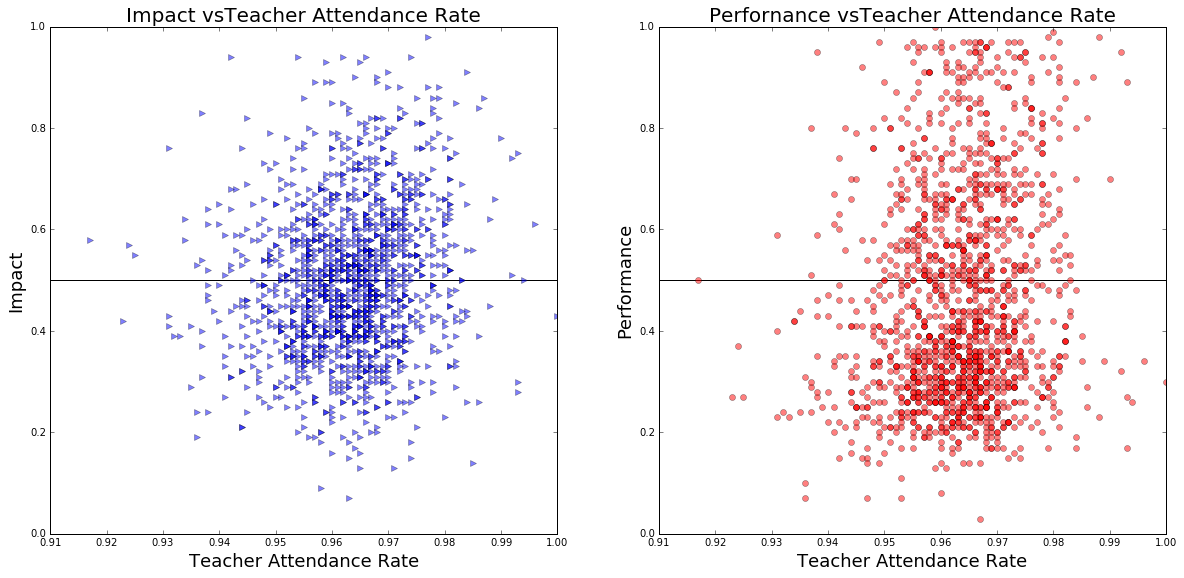

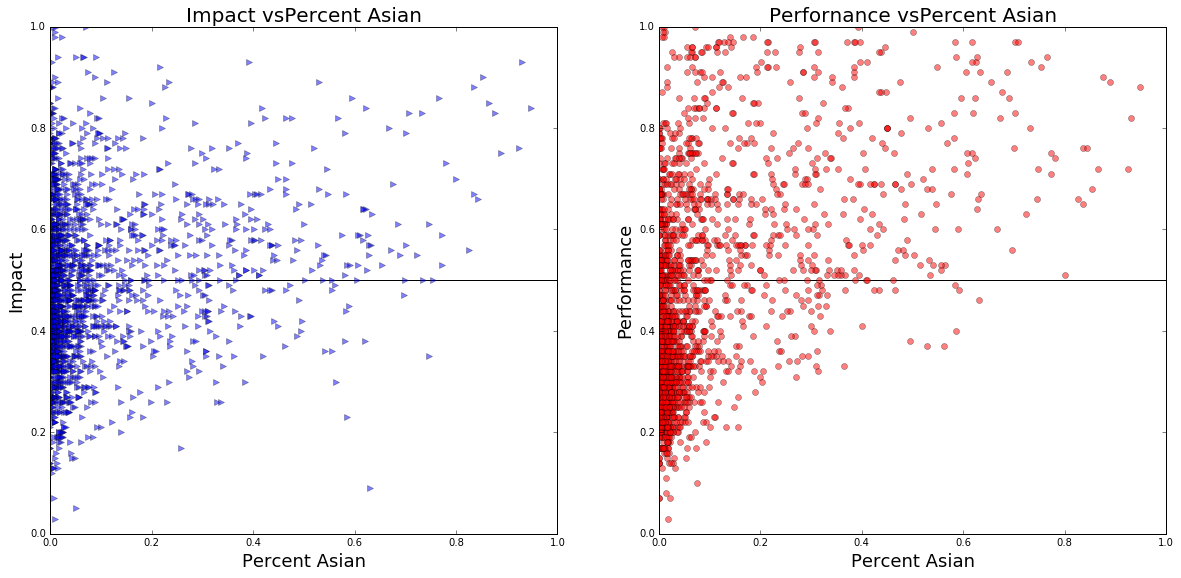

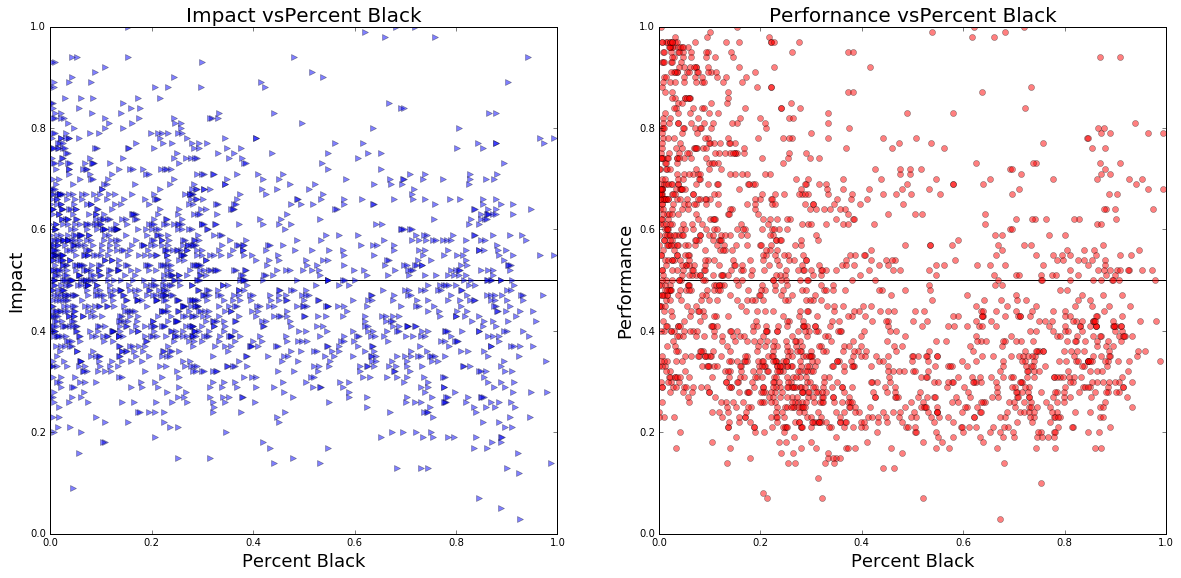

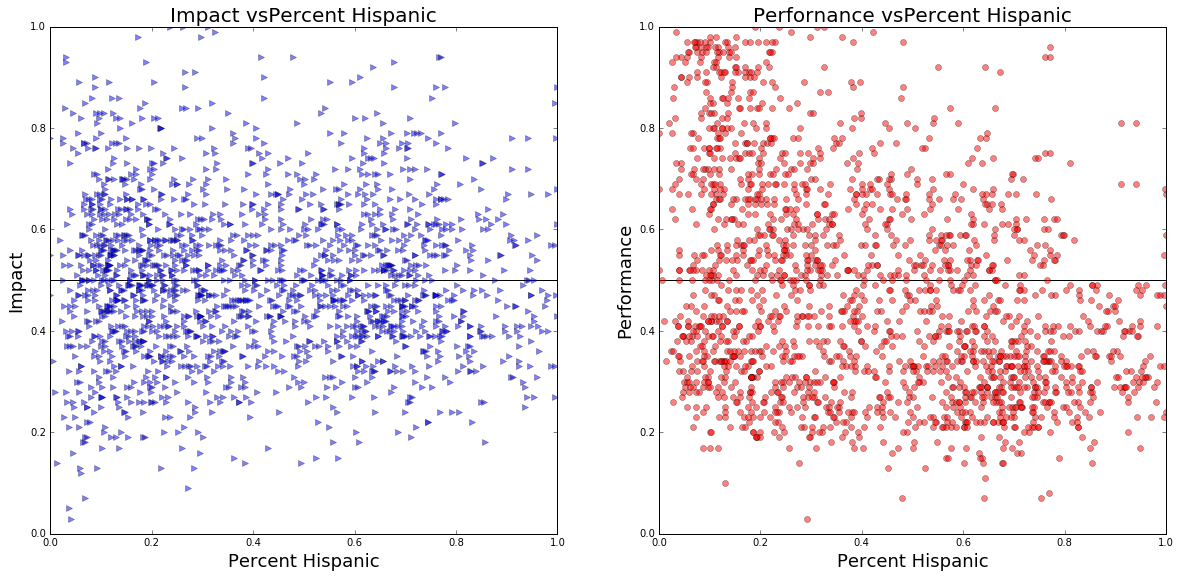

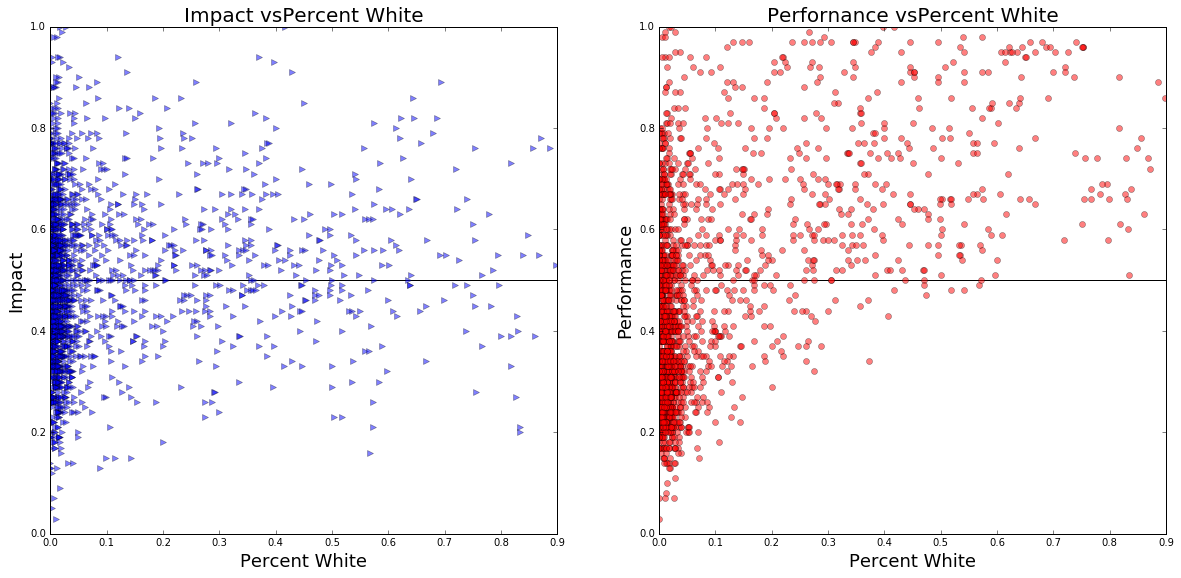

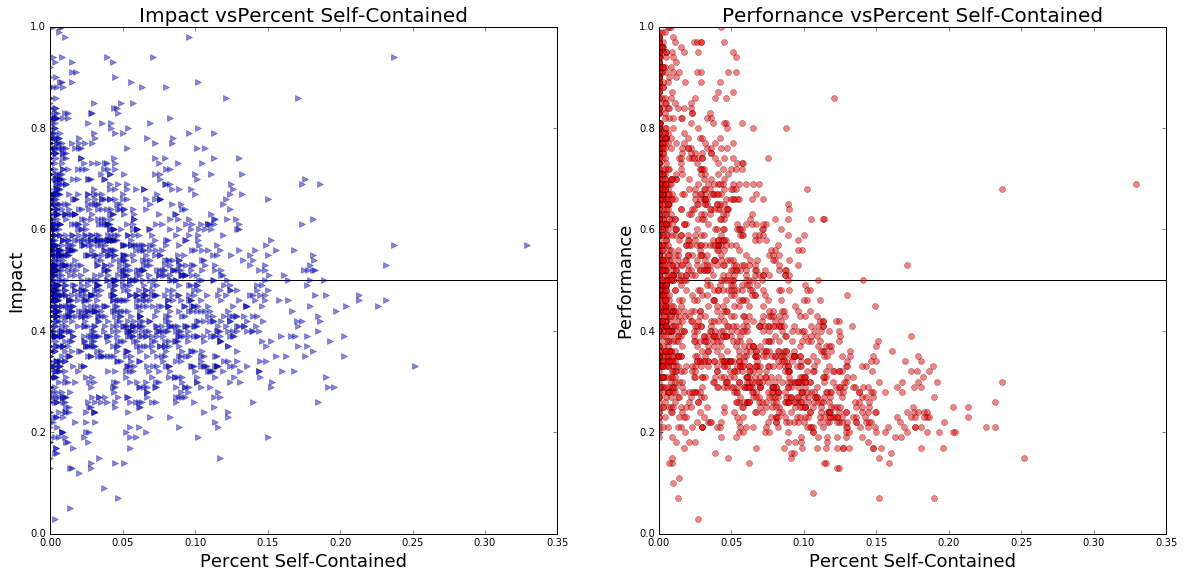

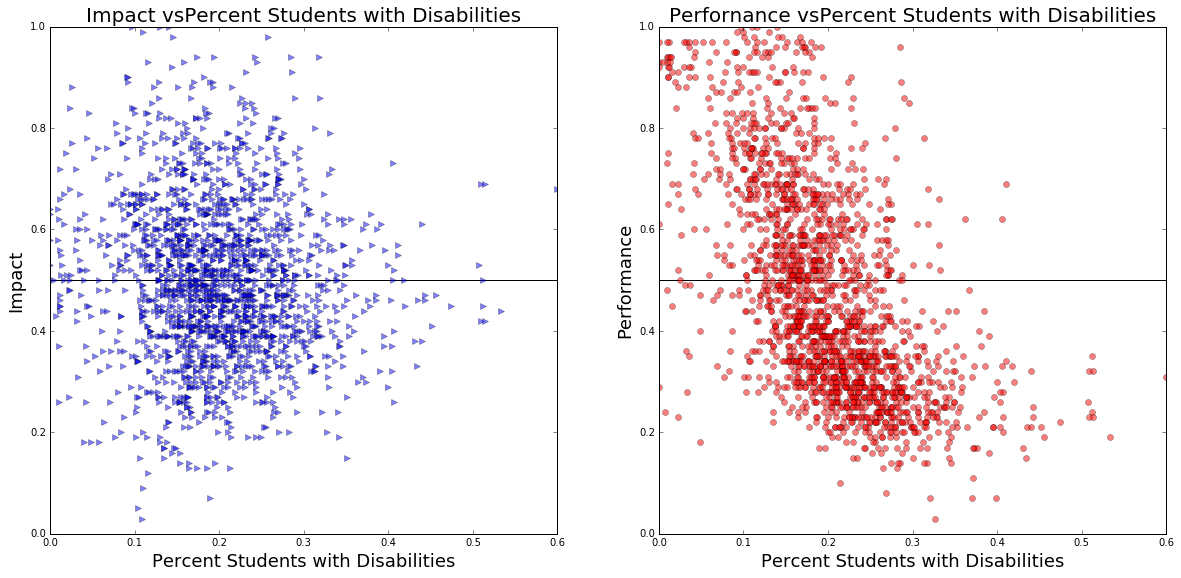

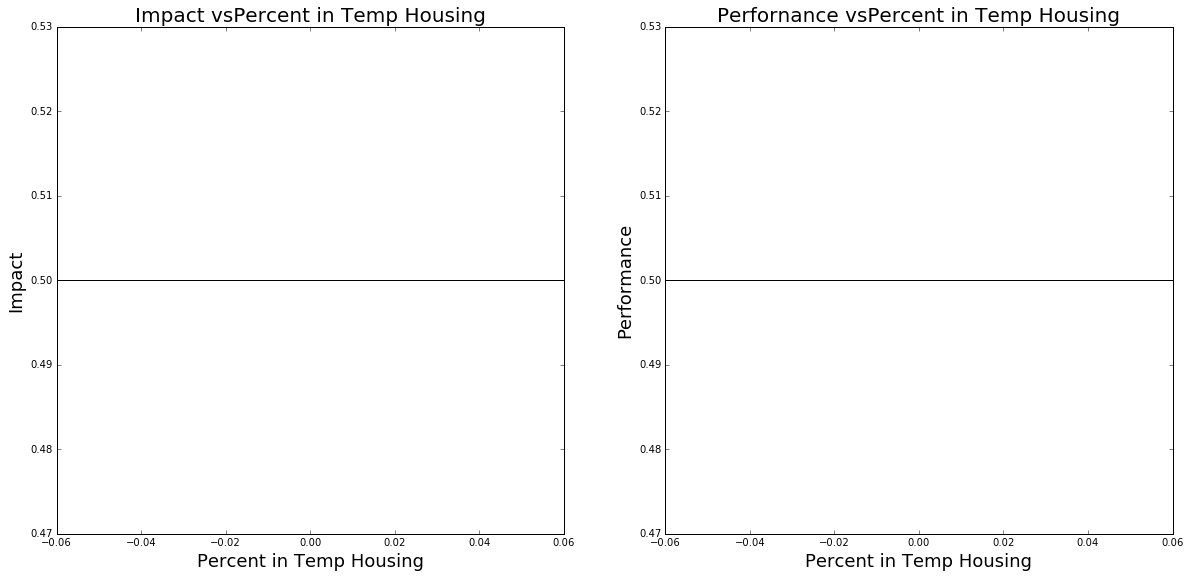

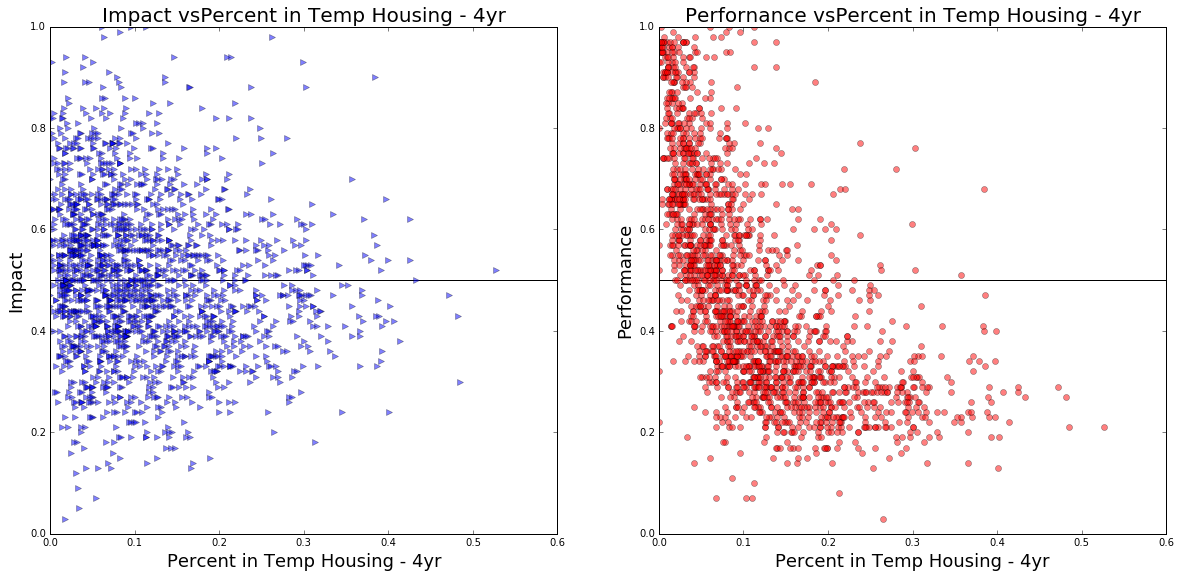

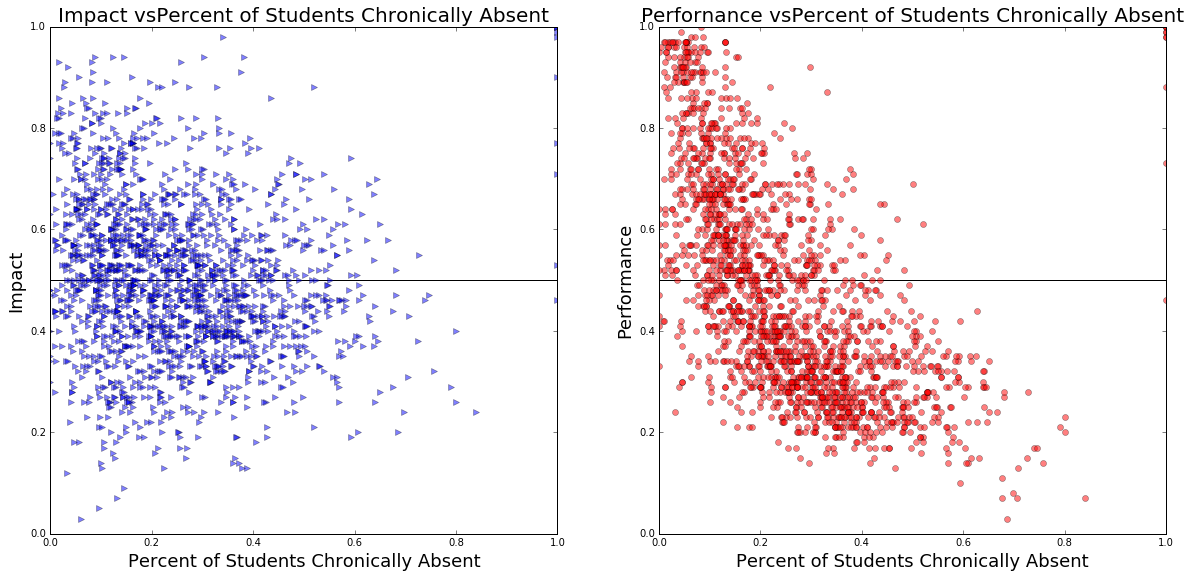

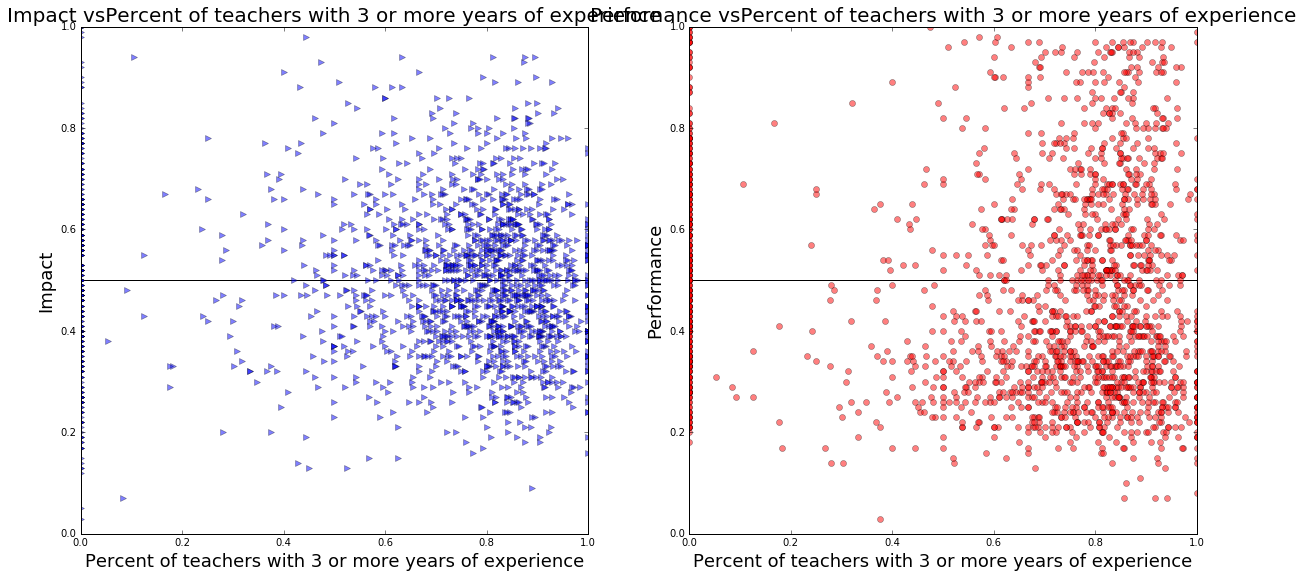

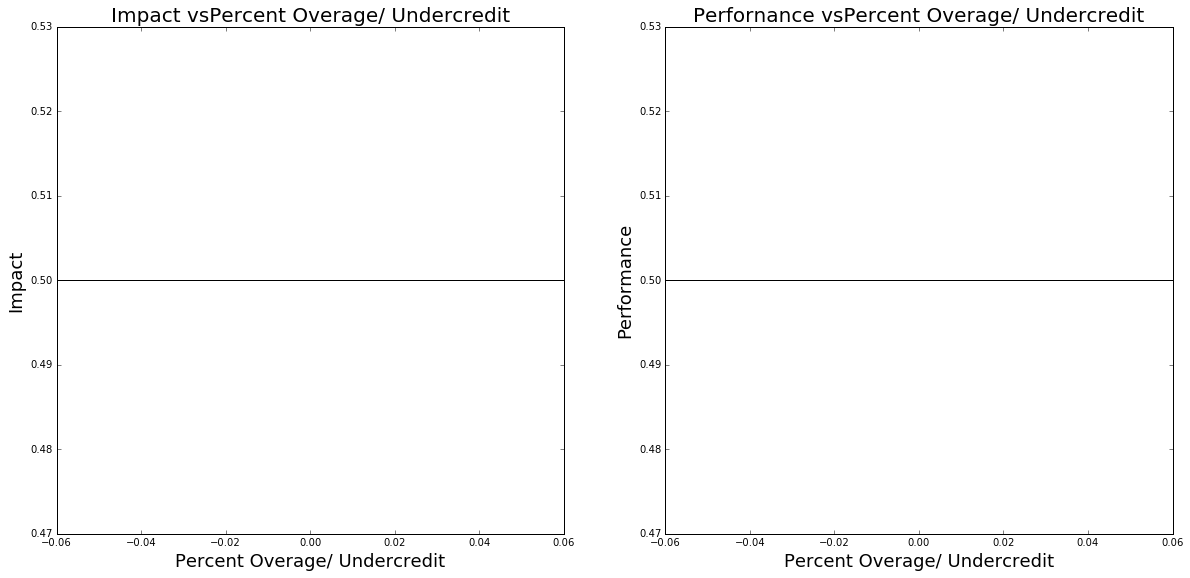

In [229]:
for t in range(len(forplot)):
    pl.figure(figsize=(20,20))
    plt.subplot(221)
    pl.plot(schoolcleanname[forplot[t]], schoolcleanname.impact,'b>', alpha=.5)
    pl.axhline(y=0.5,c="k",linewidth=1,zorder=0) #.5 for impact means the school delivered no impact to the students,
    pl.title('Impact vs ' + forplot[t], size = 20)
    pl.xlabel(forplot[t], size = 18)
    pl.ylabel('Impact', size = 18)

    plt.subplot(222)
    pl.plot(schoolcleanname[forplot[t]], schoolcleanname.performance,'ro', alpha=.5)
    pl.axhline(y=0.5,c="k",linewidth=1,zorder=0) #.5 for performance means that the meet the average

    pl.title('Perfornance vs '+ forplot[t], size = 20)
    pl.xlabel(forplot[t], size = 18)
    pl.ylabel('Performance', size = 18)


In [194]:
performancelinearmodel = smf.ols(formula='performance ~ Rigorous_Instruction + Collaborative_Teachers + Supportive_Environment + Effective_SchoolLeadership + Strong_FamilyCommunityTies + Trust', data = schoolcleanname).fit()
performancelinearmodel.params
performancelinearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            performance   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     70.65
Date:                Sat, 22 Oct 2016   Prob (F-statistic):           1.24e-79
Time:                        15:14:31   Log-Likelihood:                 467.89
No. Observations:                1907   AIC:                            -921.8
Df Residuals:                    1900   BIC:                            -882.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -0.0850      0.075     -1.132      0.258        -0.232     0.062
Rigorous_Instruction           0.2241      0.084      2.661      0.008         0.059     0.389
Collaborative_Teachers         0.0404      0.157      0.257      0.797        -0.268     0.349
Supportive_Environment         1.4135      0.101     14.002      0.000         1.216     1.612
Effective_SchoolLeadership     0.7518      0.113      6.675      0.000         0.531     0.973
Strong_FamilyCommunityTies    -0.6010      0.077     -7.792      0.000        -0.752    -0.450
Trust                         -1.1366      0.178     -6.383      0.000        -1.486    -0.787
==============================================================================
Omnibus:                       75.952   Durbin-Watson:                   1.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.256
Skew:                           0.461   Prob(JB):                     1.68e-17
Kurtosis:                       2.648   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
impactlinearmodel = smf.ols(formula='impact ~ Rigorous_Instruction + Collaborative_Teachers + Supportive_Environment + Effective_SchoolLeadership + Strong_FamilyCommunityTies + Trust', data = schoolcleanname).fit()
impactlinearmodel.params
impactlinearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 impact   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     36.52
Date:                Sat, 22 Oct 2016   Prob (F-statistic):           4.57e-42
Time:                        15:15:49   Log-Likelihood:                 940.22
No. Observations:                1907   AIC:                            -1866.
Df Residuals:                    1900   BIC:                            -1828.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      0.0717      0.059      1.225      0.221        -0.043     0.187
Rigorous_Instruction           0.0660      0.066      1.003      0.316        -0.063     0.195
Collaborative_Teachers        -0.2765      0.123     -2.251      0.025        -0.517    -0.036
Supportive_Environment         0.6763      0.079      8.582      0.000         0.522     0.831
Effective_SchoolLeadership     0.5103      0.088      5.804      0.000         0.338     0.683
Strong_FamilyCommunityTies    -0.2961      0.060     -4.917      0.000        -0.414    -0.178
Trust                         -0.1630      0.139     -1.173      0.241        -0.436     0.110
==============================================================================
Omnibus:                       12.771   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.827
Skew:                           0.191   Prob(JB):                      0.00164
Kurtosis:                       3.123   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""